# Randomness in storage

## imports

In [1]:
%run ../../setup.py
module_path = os.path.abspath(os.path.join('../../'))
if module_path not in sys.path:
    sys.path.append(module_path)
from import_data import get_data

## input file names below

In [2]:
filenames = ['no-behavior.sqlite',
             'random-both.sqlite',
             'random-frequency.sqlite',
             'random-size.sqlite']


## grab all data

In [3]:
data = {}
for file in filenames:
    (name, file_data) = get_data(file)

    file_data['storage_id'] = file_data['agents'].loc[file_data['agents']["Prototype"] == "Storage"]["AgentId"]
    # transaction subset
    file_data['t_s'] = file_data['transactions'].loc[file_data['transactions']["ReceiverId"] == file_data['storage_id'].item()]
    
    data[name] = file_data

# Plots
## transactions subplots
### ANS

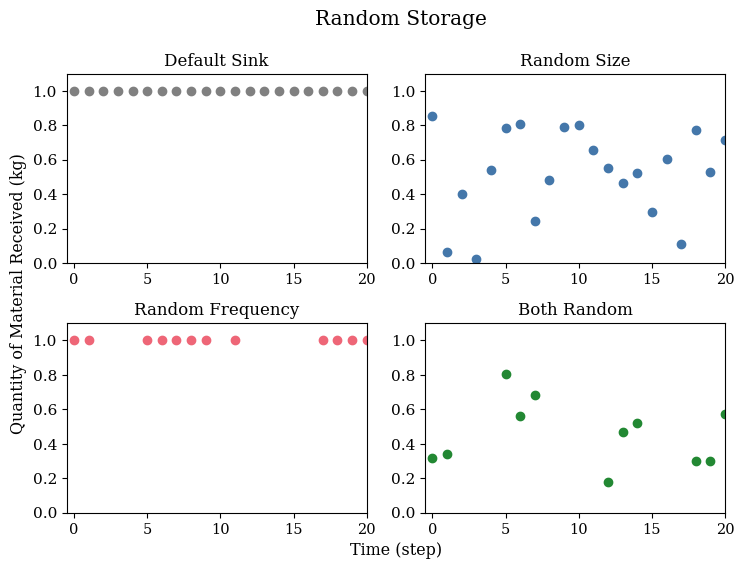

In [4]:
fig = plt.figure(figsize = (8, 6))

ax = fig.add_subplot(111)
ax.set_xlabel('Time (step)')
ax.set_ylabel('Quantity of Material Received (kg)')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top= False, bottom= False, left= False, right= False)

ax0 = fig.add_subplot(221)
plt.xlim(-0.5,20)
plt.ylim(0,1.1)
ax0.set_xticks(np.arange(0, 21, 5))
ax0.set_yticks(np.arange(0, 1.11, 0.2))

ax0.scatter(data['no-behavior']['t_s']['Time'],
            data['no-behavior']['t_s']['Quantity'],
            color= '0.5')
ax0.set_title('Default Sink')

ax1 = fig.add_subplot(222, sharex=ax0, sharey=ax0)

ax1.scatter(data['random-size']['t_s']['Time'],
            data['random-size']['t_s']['Quantity'],
            color= palette[0])
ax1.set_title('Random Size')

ax2 = fig.add_subplot(223, sharex=ax0, sharey=ax0)
ax2.scatter(data['random-frequency']['t_s']['Time'],
            data['random-frequency']['t_s']['Quantity'],
            color= palette[1])
ax2.set_title('Random Frequency')

ax3 = fig.add_subplot(224, sharex=ax0, sharey=ax0)
ax3.scatter(data['random-both']['t_s']['Time'],
            data['random-both']['t_s']['Quantity'],
            color= palette[2], )
ax3.set_title('Both Random')

fig.suptitle('Random Storage', x=0.55)
fig.tight_layout()

plt.savefig('plots/transactions-subplots-ans', transparent=True, dpi=600)


### diss

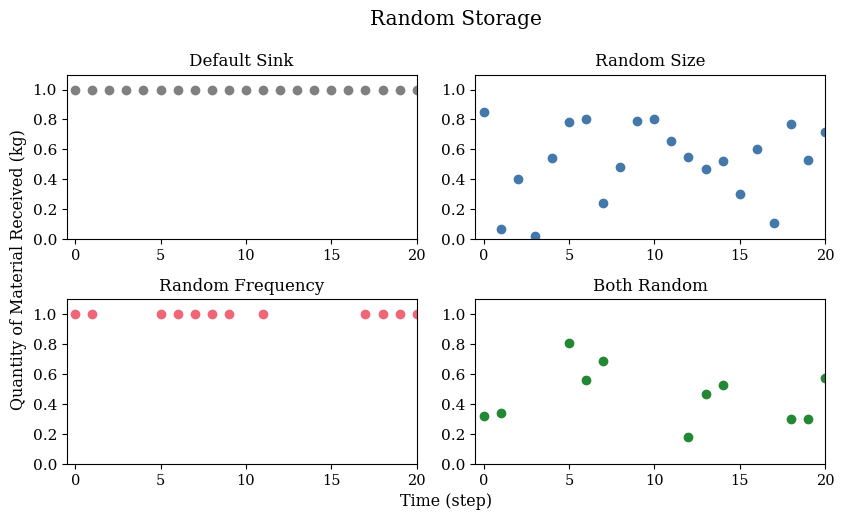

In [5]:
fig = plt.figure(figsize = (9, 5.5))

ax = fig.add_subplot(111)
ax.set_xlabel('Time (step)')
ax.set_ylabel('Quantity of Material Received (kg)')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top= False, bottom= False, left= False, right= False)

ax0 = fig.add_subplot(221)
plt.xlim(-0.5,20)
plt.ylim(0,1.1)
ax0.set_xticks(np.arange(0, 21, 5))
ax0.set_yticks(np.arange(0, 1.11, 0.2))

ax0.scatter(data['no-behavior']['t_s']['Time'],
            data['no-behavior']['t_s']['Quantity'],
            color= '0.5')
ax0.set_title('Default Sink')

ax1 = fig.add_subplot(222, sharex=ax0, sharey=ax0)

ax1.scatter(data['random-size']['t_s']['Time'],
            data['random-size']['t_s']['Quantity'],
            color= palette[0])
ax1.set_title('Random Size')

ax2 = fig.add_subplot(223, sharex=ax0, sharey=ax0)
ax2.scatter(data['random-frequency']['t_s']['Time'],
            data['random-frequency']['t_s']['Quantity'],
            color= palette[1])
ax2.set_title('Random Frequency')

ax3 = fig.add_subplot(224, sharex=ax0, sharey=ax0)
ax3.scatter(data['random-both']['t_s']['Time'],
            data['random-both']['t_s']['Quantity'],
            color= palette[2])
ax3.set_title('Both Random')

fig.suptitle('Random Storage', x=0.55)
fig.tight_layout()

plt.savefig('plots/transactions-subplots-diss', transparent=True, dpi=600)


## Cumulative received subplots

In [6]:
data['no-behavior']['t_s']['CumQuant'] = data['no-behavior']['t_s']['Quantity'].cumsum()
data['random-size']['t_s']['CumQuant'] = data['random-size']['t_s']['Quantity'].cumsum()
data['random-frequency']['t_s']['CumQuant'] = data['random-frequency']['t_s']['Quantity'].cumsum()
data['random-both']['t_s']['CumQuant'] = data['random-both']['t_s']['Quantity'].cumsum()


/tmp/ipykernel_60844/2523322786.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['no-behavior']['t_s']['CumQuant'] = data['no-behavior']['t_s']['Quantity'].cumsum()
/tmp/ipykernel_60844/2523322786.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['random-size']['t_s']['CumQuant'] = data['random-size']['t_s']['Quantity'].cumsum()
/tmp/ipykernel_60844/2523322786.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

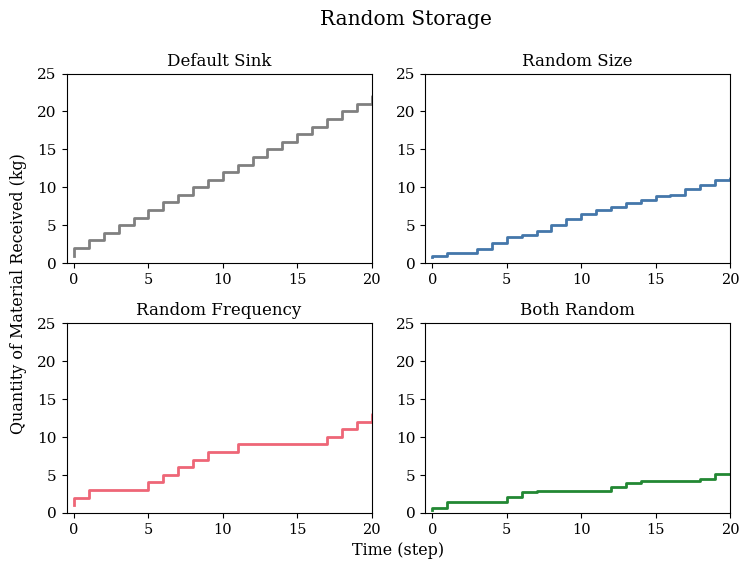

In [7]:
fig = plt.figure(figsize = (8, 6))

ax = fig.add_subplot(111)
ax.set_xlabel('Time (step)')
ax.set_ylabel('Quantity of Material Received (kg)')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top= False, bottom= False, left= False, right= False)

ax0 = fig.add_subplot(221)
plt.xlim(-0.5,20)
plt.ylim(0,25)
ax0.set_xticks(np.arange(0, 21, 5))
ax0.set_yticks(np.arange(0, 26, 5))

ax0.step(data['no-behavior']['t_s']['Time'],
         data['no-behavior']['t_s']['CumQuant'],
         linewidth= 2, 
         color= '0.5')
ax0.set_title('Default Sink')

ax1 = fig.add_subplot(222, sharex=ax0, sharey=ax0)

ax1.step(data['random-size']['t_s']['Time'],
         data['random-size']['t_s']['CumQuant'],
         linewidth= 2,
         color= palette[0])
ax1.set_title('Random Size')

ax2 = fig.add_subplot(223, sharex=ax0, sharey=ax0)
ax2.step(data['random-frequency']['t_s']['Time'],
         data['random-frequency']['t_s']['CumQuant'],
         linewidth= 2, 
         color= palette[1],)
ax2.set_title('Random Frequency')

ax3 = fig.add_subplot(224, sharex=ax0, sharey=ax0)
ax3.step(data['random-both']['t_s']['Time'],
         data['random-both']['t_s']['CumQuant'],
         linewidth= 2, 
         color= palette[2])
ax3.set_title('Both Random')

fig.suptitle('Random Storage', x=0.55)
fig.tight_layout()

#plt.savefig('plots/cumulative-subplots', transparent=True)


## Cumulative single plot

Text(0.5, 1.0, 'Random Storage')

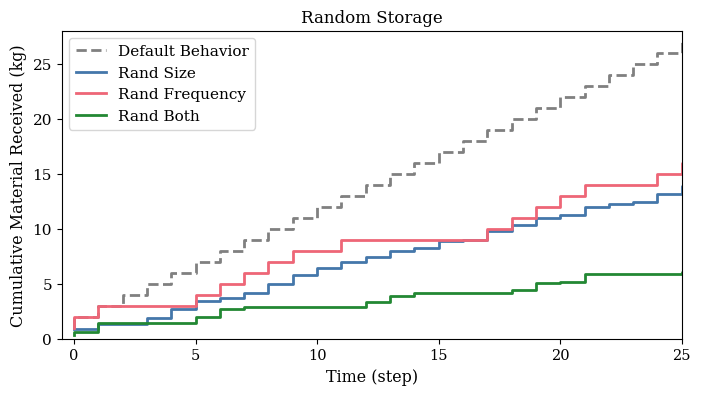

In [8]:
fig = plt.figure(figsize = (8, 4))

ax = fig.add_subplot(111)
ax.set_xlabel('Time (step)')
ax.set_ylabel('Cumulative Material Received (kg)')

plt.xlim(-0.5,25)
plt.ylim(0,28)
ax.set_xticks(np.arange(0, 26, 5))
ax.set_yticks(np.arange(0, 29, 5))


ax.step(data['no-behavior']['t_s']['Time'],
        data['no-behavior']['t_s']['CumQuant'],
        where='pre', linewidth= 2,
        color= '0.5',
        ls='dashed', label='Default Behavior')

ax.step(data['random-size']['t_s']['Time'],
        data['random-size']['t_s']['CumQuant'],
        where='pre', linewidth= 2,
        color= palette[0],
        label='Rand Size')

ax.step(data['random-frequency']['t_s']['Time'],
        data['random-frequency']['t_s']['CumQuant'],
        where='pre', linewidth= 2,
        color= palette[1],
        label='Rand Frequency')

ax.step(data['random-both']['t_s']['Time'],
        data['random-both']['t_s']['CumQuant'],
        where='pre', linewidth= 2,
        color= palette[2], 
        label='Rand Both')

ax.legend(loc = 'upper left')

plt.title('Random Storage')

#plt.savefig('plots/cumulative-oneplot', transparent=True)
